<a href="https://colab.research.google.com/github/Seif-R15/IMDB_Sentiment_Analysis_Prediction/blob/main/NLP_with_Bert_for_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP with Bert for Sentiment Analysis

### Importing the libraries

In [ ]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 65.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316934 sha256=ff71e6d9876e482bfe293e6876299595b14547d398d9fef33eb03a3f7cae54a3
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=

In [ ]:
import os.path
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

## Part 1: Data Preprocessing

### Loading the IMDB dataset

In [ ]:
dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz",
                                  origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                  extract=True)
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 13s 0us/step


In [ ]:
print(os.path.dirname(dataset))
print(IMDB_DATADIR)

/root/.keras/datasets
/root/.keras/datasets/aclImdb


### Creating the training and test sets

load and preprocess text data from the IMDB directory into training and test sets, with the classes being 'positive' and 'negative' and a maximum sequence length of 500 tokens. The data is preprocessed using a BERT model for use in training and evaluation.

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(datadir=IMDB_DATADIR,
                                                                       classes=['pos','neg'],
                                                                       maxlen=500,
                                                                       train_test_names=['train','test'],
                                                                       preprocess_mode='bert')

detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


## Part 2: Building the BERT model

Create a text classifier model using BERT and providing the preprocessed training data along with the preprocessing pipeline. This function sets up the model for training on the dataset.

In [ ]:
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)

Is Multi-Label? False
maxlen is 500


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


## Part 3: Training the BERT model

Settong the parameters for the training process

In [ ]:
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

Finding the best learning rate with the lowest possible loss

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4167/4167 [==============================] - 65s 15ms/step - loss: 0.1139 - accuracy: 0.9561


/usr/local/lib/python3.10/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


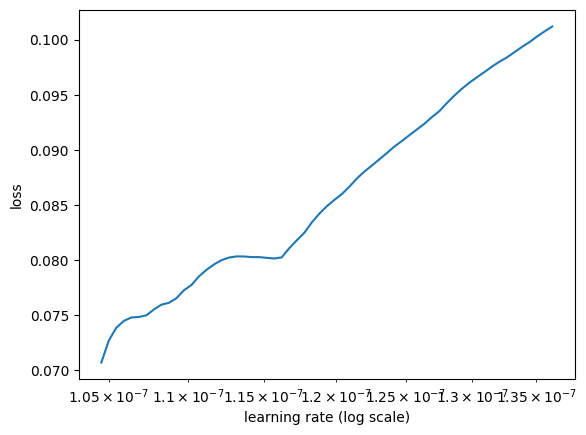

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)

Training the model using the one cycle learning rate for 4167 iteration cycle with a learning rate of 0.002 or 2e-5 deduced from the previous plot

In [ ]:
learner.fit_onecycle(lr=2e-5,
                     epochs=1)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - 4785s 1s/step - loss: 0.2549 - accuracy: 0.8917 - val_loss: 0.1645 - val_accuracy: 0.9386


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictions = predictor.predict("This is the worst movie ever.")
print(f'The Rating is: {predictions}tve')

The Rating is: negtve


In [ ]:
predictions = predictor.predict("The movie lakes action in it however the overall was good to me actualy.")
print(f'The Rating is: {predictions}tve')

The Rating is: postve


In [ ]:
predictions = predictor.predict("The movie lakes some action in it")
print(f'The Rating is: {predictions}tve')

The Rating is: negtve


In [ ]:
predictions = predictor.predict("This was extraordinary.")
print(f'The Rating is: {predictions}tve')

The Rating is: postve
